In [3]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos

In [5]:
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target

In [10]:
X = pd.DataFrame(iris.data, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns = ['Target'])
X.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Petal Width')

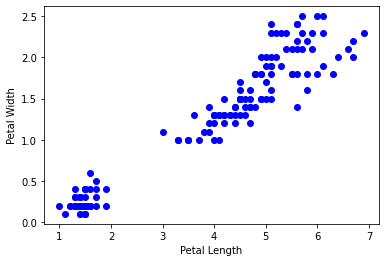

In [11]:
plt.scatter(X['Petal Length'], X['Petal Width'], c= 'blue')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

# Construcción y evaluación del modelo

In [12]:
model = KMeans(n_clusters = 3, max_iter = 1000)
model.fit(X)
y_labels = model.labels_

In [13]:
y_kmeans = model.predict(X)
print('Predicciones ', y_kmeans)

Predicciones  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [14]:
from sklearn import metrics

accuracy = metrics.adjusted_rand_score(y_iris, y_kmeans)
print(accuracy)

0.7302382722834697


Text(0, 0.5, 'Petal Width')

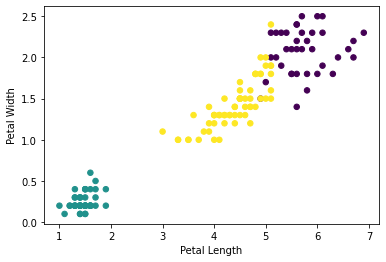

In [15]:
plt.scatter(X['Petal Length'], X['Petal Width'], c=y_kmeans, s=30)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

Realizar una practica con el dataset de vinos

In [21]:
wine = datasets.load_wine()

In [22]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

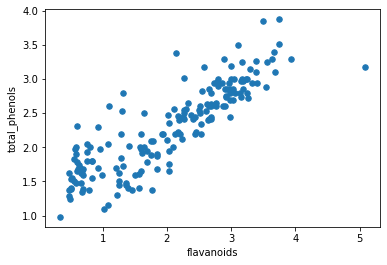

0.37111371823084754
0.47627086172451033


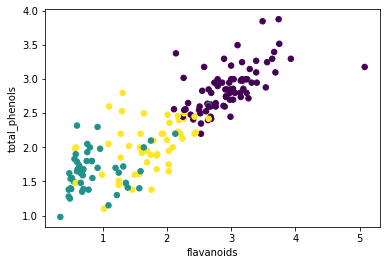

In [23]:
x = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.DataFrame(wine.target, columns=["Target"])

corr = x.corr()
corr.style.background_gradient(cmap='coolwarm')

plt.scatter(x['flavanoids'],x['total_phenols'], s=30)
plt.xlabel('flavanoids',fontsize=10)
plt.ylabel('total_phenols',fontsize=10)
plt.show()

model = KMeans(n_clusters=3,max_iter=1000)
model.fit(x)

y_labels = model.labels_

acuracy = metrics.adjusted_rand_score(wine.target, y_labels)
print(acuracy)

##### 0.37111371823084754

new_x = x[["flavanoids","total_phenols","malic_acid","hue","od280/od315_of_diluted_wines"]]
model = KMeans(n_clusters=3,max_iter=1000)
model.fit(new_x)

y_labels = model.labels_

acuracy = metrics.adjusted_rand_score(wine.target, y_labels)
print(acuracy)

###### 0.47627086172451033

plt.scatter(x['flavanoids'],x['total_phenols'], c=y_labels,s=30)
plt.xlabel('flavanoids',fontsize=10)
plt.ylabel('total_phenols',fontsize=10)
plt.show()